# Distribuciones en forma de anillo

In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

In [3]:
data1 = ring(3, 5)
data2 = ring(24, 27)
data = np.concatenate([data1, data2], axis = 0)
print(data1)
print(data2)
print(data.head)

[[ 2.42909472e-01 -4.82842185e+00]
 [ 3.50966970e+00 -3.16945022e-01]
 [ 4.24304097e+00 -1.20950385e+00]
 [-2.97127263e+00 -1.59964828e+00]
 [ 2.27582789e+00  3.53839043e+00]
 [-2.88227880e+00  2.08351694e+00]
 [-3.87961285e-01 -4.66862390e+00]
 [-6.04182520e-01 -4.08670528e+00]
 [-3.66628719e+00  1.31402229e+00]
 [-1.17028636e+00  3.27583481e+00]
 [-2.45652848e+00  2.31061658e+00]
 [ 3.43768680e+00 -2.29215356e-01]
 [-2.10296375e+00  3.88827097e+00]
 [-2.79655618e+00  2.21376996e+00]
 [ 3.03873222e+00 -3.84699228e+00]
 [ 1.47364488e+00  4.48784688e+00]
 [ 3.65638707e+00  2.60615783e+00]
 [-2.99680650e+00  3.70508857e+00]
 [-2.37669835e+00 -3.64488015e+00]
 [-3.28150088e+00 -9.14250609e-02]
 [-3.97255493e+00 -2.01283815e+00]
 [ 3.00317461e+00 -1.21774253e+00]
 [ 2.32690265e+00 -4.39949418e+00]
 [ 3.81621879e+00  3.09014344e+00]
 [ 2.92338436e+00  8.96383668e-01]
 [-3.05748691e+00  6.95873554e-01]
 [ 3.66494698e+00  2.71639125e+00]
 [-1.26294432e+00  4.74991991e+00]
 [ 3.12023685e+00 -1

AttributeError: 'numpy.ndarray' object has no attribute 'head'

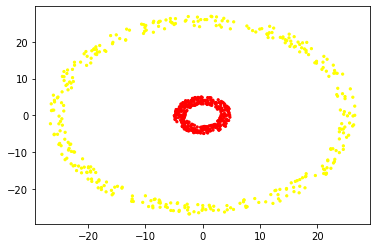

In [10]:
data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")

# Algoritmo con Kmeans

In [11]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(2).fit(data)

In [13]:
clust = km.predict(data)# predicion del los cluster

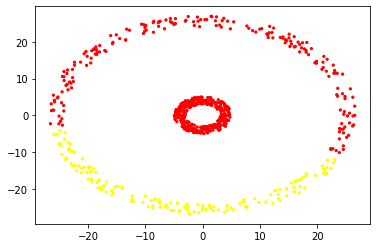

In [17]:
plt.scatter(data[:,0], data[:, 1], c = clust, s = 5, cmap="autumn")

# Algoritmo de los K Medoides

In [28]:
from pyclust import KMedoids

In [29]:
kmed = KMedoids(2).fit_predict(data)# hace el modelo y hace la predicion de dos medoides

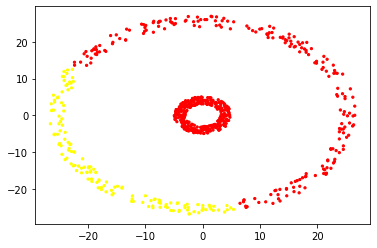

In [30]:
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="autumn")

# Algoritmo del Clustering Espectral

In [31]:
from sklearn.cluster import SpectralClustering

In [32]:
clust = SpectralClustering(2).fit_predict(data)

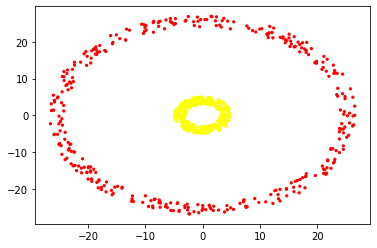

In [33]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "autumn")

* Podemos estimar la k:
    * No: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales:
            * Si: K-Medoides 
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering Espectral